In [1]:
import jax as J
import jax.numpy as jnp
from jax import jit

In [2]:
@jit
def model(params, x):
    w, b = params
    return w * x + b

@jit
def loss(params, x, y):
    y_pred = model(params, x)
    return jnp.mean((y_pred - y) ** 2)

In [3]:
# gradient descent
@jit
def gd(params, x, y, lr):
    return params - lr * J.grad(loss)(params, x, y)

In [4]:
key = J.random.PRNGKey(42)
# w and b
params = J.random.normal(key, (2, ))
params

DeviceArray([-2.169826  ,  0.46480063], dtype=float32)

In [5]:
# 2 new keys
# one for xs, another for noise

# +1 for key
key, *newkeys = J.random.split(key, 2 + 1)

xs = J.random.normal(newkeys[0], (100,))
noise = J.random.normal(newkeys[1], (100,))

ys = xs * 3 - 1 + noise

In [6]:
from tqdm import tqdm

for _ in tqdm(range(1000)):
    params = gd(params, xs, ys, 0.01)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 9576.50it/s]


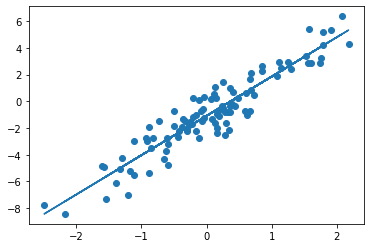

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.plot(xs, model(params, xs))

In [8]:
w, b = params
print(w, b)

2.9418302 -1.0934553
